# Demo of classification networks
In this demo, we will develop simple classification network. We will also explore how to use existing network using transfer learning.

## Classification
Classification is predicting the class of the input image.

# Importing needed libs

In [1]:
import tensorflow as tf

from tensorflow import keras

import numpy as np

from sklearn.metrics import *

import matplotlib.pyplot as plt

#from tensorflow_datasets import datasets

## Data

In [2]:
keras.datasets.mnist.load_data(path='mnist.npz')

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

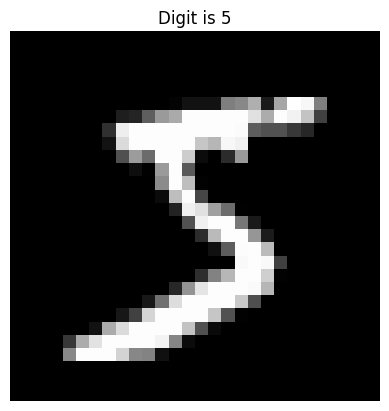

In [4]:
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.title('Digit is ' + str(y_train[0]))
plt.axis('off')
plt.show()

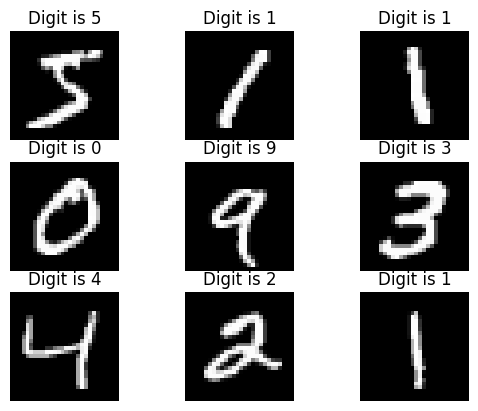

In [5]:
GSZ = 3

fig, axs = plt.subplots(GSZ, GSZ)

for i in range(GSZ):

  for j in range(GSZ):

    axs[i][j].imshow(x_train[i+GSZ*j], cmap='gray')
    axs[i][j].set_title('Digit is ' + str(y_train[i+GSZ*j]))
    axs[i][j].axis('off')


# Adjust Data

In [6]:
x_train = np.expand_dims(x_train, axis=-1)

print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
x_test = np.expand_dims(x_test, axis=-1)

print(x_test.shape)

(10000, 28, 28, 1)


In [8]:
y_train = keras.utils.to_categorical(y_train)

print(y_train.shape)

(60000, 10)


In [29]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_test = keras.utils.to_categorical(y_test)

print(y_test.shape)

(10000, 10)


# Network
We will develop a simple netowork with 2 conv layers, 2 pooling layers, 1 flatten layer, 2 dense layers, and softmax layer.

In [10]:
# creating layers

# input

inputs = keras.layers.Input((28, 28, 1))

# 2 conv

conv1 = keras.layers.Conv2D(32, 3, 1, activation='relu', padding='same')

conv2 = keras.layers.Conv2D(64, 3, 1, activation='relu', padding='same')

# 2 pool

pool1 = keras.layers.MaxPool2D((2, 2))

pool2 = keras.layers.MaxPool2D((2, 2))

# flat

gap = keras.layers.GlobalAveragePooling2D()

# 2 dense

dense1 = keras.layers.Dense(64, 'relu')

dense2 = keras.layers.Dense(10)

# 2 dropouts

dropout1 = keras.layers.Dropout(0.5)

dropout2 = keras.layers.Dropout(0.5)

# output (softmax)

act = keras.layers.Activation('softmax')

In [11]:
# connecting layers

x = conv1(inputs)

x = pool1(x)

x = conv2(x)

x = pool2(x)

x = gap(x)

x = dense1(x)

x = dropout1(x)

x = dense2(x)

x = dropout2(x)

x = act(x)

In [12]:
# model creation

model = keras.models.Model(inputs=inputs, outputs=x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 64)               0     

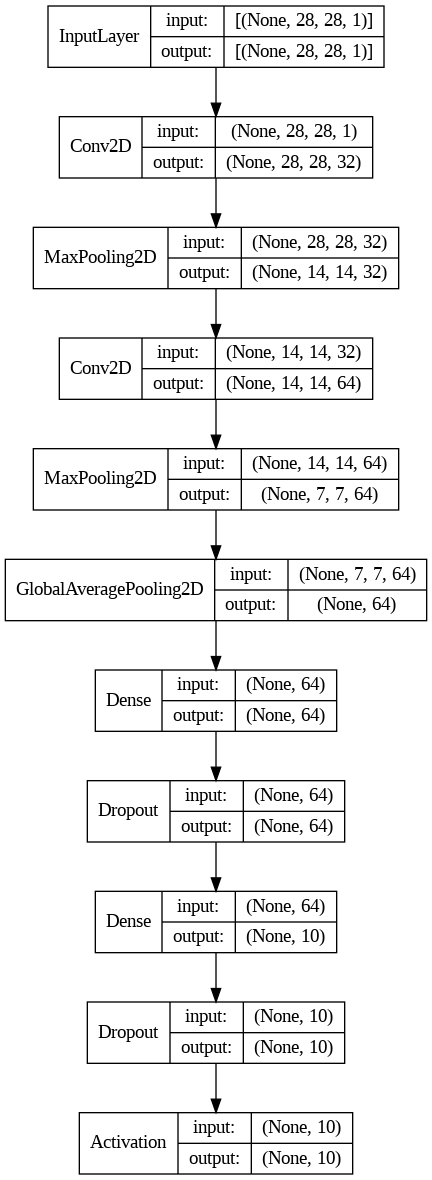

In [14]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=False)

# Training Settings

In [15]:
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics='acc')

# Start training

In [16]:
model.fit(x_train, y_train, batch_size=25, epochs=10, validation_data=[x_test, y_test], validation_batch_size=25)

Epoch 1/10
2400/2400 [==============================] - 103s 41ms/step - loss: 2.3162 - acc: 0.2253 - val_loss: 1.7086 - val_acc: 0.6046
Epoch 2/10
2400/2400 [==============================] - 96s 40ms/step - loss: 1.8376 - acc: 0.3400 - val_loss: 1.2862 - val_acc: 0.7948
Epoch 3/10
2400/2400 [==============================] - 99s 41ms/step - loss: 1.6386 - acc: 0.4043 - val_loss: 0.9568 - val_acc: 0.8580
Epoch 4/10
2400/2400 [==============================] - 95s 40ms/step - loss: 1.5295 - acc: 0.4371 - val_loss: 0.8067 - val_acc: 0.8978
Epoch 5/10
2400/2400 [==============================] - 96s 40ms/step - loss: 1.4442 - acc: 0.4599 - val_loss: 0.6712 - val_acc: 0.9195
Epoch 6/10
2400/2400 [==============================] - 94s 39ms/step - loss: 1.3978 - acc: 0.4743 - val_loss: 0.5179 - val_acc: 0.9309
Epoch 7/10
2400/2400 [==============================] - 98s 41ms/step - loss: 1.3462 - acc: 0.4881 - val_loss: 0.4836 - val_acc: 0.9284
Epoch 8/10
2400/2400 [=========================

In [20]:
img = x_test[0]

print(img.shape)

label = y_test[0]

print(label)

(28, 28, 1)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
digit = np.argmax(label)

print(digit)

7


(-0.5, 27.5, 27.5, -0.5)

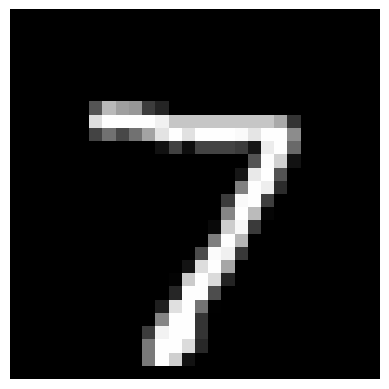

In [23]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')

In [26]:

pred = model.predict(np.expand_dims(img, axis=0))


1/1 [==============================] - 0s 46ms/step


In [32]:
print(np.round(pred, 2))

print(np.sum(pred))

[[0.   0.01 0.   0.   0.   0.   0.   0.98 0.   0.  ]]
1.0


In [28]:
predicted_digit = np.argmax(pred)

print(predicted_digit)

7
